<a href="https://colab.research.google.com/github/alexdel1/TestPresentation/blob/main/TestTexGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

%%capture
!apt-get update
!apt-get install -y texlive-latex-base texlive-latex-extra texlive-science texlive-fonts-recommended texlive-pictures

In [3]:

%%capture
!sudo apt install graphviz libgraphviz-dev
#ne pas oublier la version dev de graphviz
!sudo apt update
!pip install pygraphviz

!apt-get update
!apt-get install -y texlive-latex-base texlive-latex-extra texlive-science texlive-fonts-recommended texlive-picturesimport pygraphviz
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, to_agraph
import os
import sys
import subprocess
from IPython.display import SVG

In [4]:

%%capture
!sudo apt install dvipng

In [5]:

%%capture
!apt-get install -y texlive-base

In [6]:
%%capture
!sudo apt-get update
!sudo apt-get install -y texlive-latex-base

In [7]:


%%capture
!apt-get update
!apt-get install -y texlive-latex-base texlive-latex-extra texlive-science texlive-fonts-recommended texlive-pictures

In [8]:
#!apt-get install texlive-fonts-extra

In [1]:

pip install dot2tex

  Using cached dot2tex-2.11.3-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached dot2tex-2.11.3-py2.py3-none-any.whl (36 kB)


In [2]:

!sudo apt update
!sudo apt install texlive-xetex

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
57 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

Graph saved as testgraph.dot
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./testgraph.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/dvips.def)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/svgnam.def)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/x11nam.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/pgf/frontendlayer/tikz.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/share/texlive/texmf-dist/tex/latex/p

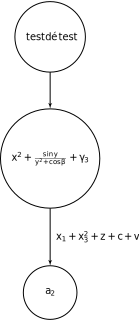

In [5]:
from IPython.display import SVG
# Save the graph as a .dot file
testgraph = r"""
digraph G {
node [shape=circle];
 a_1 [texlbl="$x^2+\frac{\sin y}{y^2+\cos \beta}+\gamma_3$"];
    a_1 -> a_2 [label=" ", texlbl="$x_1+x_3^2+z+c+v~~$"];
    test_de_text -> a_1;
     test_de_text [texlbl="test dé test"]
}
"""

# Specify the filename
filename = 'testgraph.dot'

# Write the graph to the .dot file
with open(filename, 'w') as f:
    f.write(testgraph)

print(f"Graph saved as {filename}")


!dot2tex --docpreamble "\usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}"  -tmath --autosize testgraph.dot > testgraph.tex
!latex testgraph.tex

!dvisvgm testgraph.dvi

SVG("testgraph.svg")

In [16]:
import io
import dot2tex
import networkx as nx
import csv
from io import StringIO
import pandas as pd
from networkx.drawing.nx_agraph import write_dot, to_agraph
import os
import sys
import subprocess
from IPython.display import SVG# Contenu des données CSV sous forme de chaîne

csv_data = r"""source,target,label,style
éq. déc.,déc.,3.1.23
éq. irr.,irr.,3.1.24
éq. comp. réd.,comp. réd.,3.1.25
unit.,irr.,3.2.3,dashed
éq. unit.,éq. irr.,éq. 3.2.3,dashed
unit.,déc.,3.2.3,dashed
éq. unit.,éq. déc.,éq. 3.2.3,dashed
fini,éq. unit.,3.2.4
fini,irr.,3.2.5,dashed
fini,déc.,3.2.5,dashed
irr.,indéc.,3.2.7 pas la réciproque
fini,comp. réd.,3.2.8 Maschke
'$\phi \nsim \rho$','$\frac{\gamma}{x^2}$',test"""

# Read CSV from string using pandas with UTF-8 encoding
df = pd.read_csv(io.StringIO(csv_data), encoding='utf-8', quotechar="'")

# Display the DataFrame
print(df)

# Optional: Display specific information
print("\nColumns:", list(df.columns))
print("\nShape:", df.shape)


# Create a directed graph
G = nx.DiGraph()

# Utiliser DictReader pour lire les colonnes avec des noms
reader = csv.DictReader(csv_data)

for row in reader:
    # Ajouter une arête avec des attributs
    G.add_edge(
        row["source"],
        row["target"],
        style=row["style"],
        label=row["label"]
    )
#G.add_edge("$\phi \nsim \rho$","$\frac{\gamma}{x^2}$",label="test")
print("here")
# Afficher les arêtes et leurs attributs
for u, v, data in G.edges(data=True):
    print(f"Edge from {u} to {v} with attributes {data}")
print("there")

# Charger les données dans un DataFrame
df = pd.read_csv(StringIO(csv_data))

# Afficher le DataFrame
display(df)

# Convertir le graphe en pygraphviz AGraph
A = to_agraph(G)
print(A)
# Personnaliser le style
A.graph_attr.update(rankdir="LR")  # Orientation de gauche à droite
A.node_attr.update(fontsize="10", style="filled")
A.edge_attr.update(color="black", arrowsize="0.5")
A.graph_attr.update(encoding="utf-8")

# After applying styles to A
#A.body.insert(0, f'digraph G {{ encoding = "UTF-8";\n')  # Add encoding line

# Write directly to a DOT file
A.write("graph.dot")


# Define the base file name
filename = "graph"

# Run the commands using subprocess and suppress output except for the SVG
with open(os.devnull, 'w') as devnull:
    subprocess.run(f"dot2tex --format tikz --texmode raw {filename}.dot > {filename}.tex", shell=True, stdout=devnull, stderr=devnull)
    subprocess.run(f"latex {filename}.tex", shell=True, stdout=devnull, stderr=devnull)
    subprocess.run(f"dvisvgm {filename}.dvi", shell=True, stdout=devnull, stderr=devnull)

# Display the SVG
SVG(f"{filename}.svg")

               source                target                    label   style
0            éq. déc.                  déc.                   3.1.23     NaN
1            éq. irr.                  irr.                   3.1.24     NaN
2      éq. comp. réd.            comp. réd.                   3.1.25     NaN
3               unit.                  irr.                    3.2.3  dashed
4           éq. unit.              éq. irr.                éq. 3.2.3  dashed
5               unit.                  déc.                    3.2.3  dashed
6           éq. unit.              éq. déc.                éq. 3.2.3  dashed
7                fini             éq. unit.                    3.2.4     NaN
8                fini                  irr.                    3.2.5  dashed
9                fini                  déc.                    3.2.5  dashed
10               irr.                indéc.  3.2.7 pas la réciproque     NaN
11               fini            comp. réd.            3.2.8 Maschke     NaN

KeyError: 'source'

In [22]:

import io
import pandas as pd
import csv
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
import subprocess
from IPython.display import SVG

# Contenu des données CSV sous forme de chaîne
csv_data = r"""source,target,label,style
éq. déc.,déc.,3.1.23
éq. irr.,irr.,3.1.24
éq. comp. réd.,comp. réd.,3.1.25
unit.,irr.,3.2.3,dashed
éq. unit.,éq. irr.,éq. 3.2.3,dashed
unit.,déc.,3.2.3,dashed
éq. unit.,éq. déc.,éq. 3.2.3,dashed
fini,éq. unit.,3.2.4
fini,irr.,3.2.5,dashed
fini,déc.,3.2.5,dashed
irr.,indéc.,3.2.7 pas la réciproque
fini,comp. réd.,3.2.8 Maschke
'$\phi \nsim \rho$','$\frac{\gamma}{x^2}$',test"""

# Lire les données CSV dans un DataFrame avec pandas
df = pd.read_csv(io.StringIO(csv_data), encoding='utf-8', quotechar="'")

# Afficher les noms de colonnes pour vérifier qu'ils sont corrects
print("\nColumns:", df.columns.tolist())

# Vérifier les premières lignes du DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Créer un graphe dirigé
G = nx.DiGraph()

# Utiliser DictReader pour lire les colonnes avec des noms
reader = csv.DictReader(io.StringIO(csv_data))

# Afficher les noms de colonnes dans le DictReader pour déboguer
print("\nColumns from DictReader:", reader.fieldnames)

for row in reader:
    # Ajouter une arête avec des attributs
    G.add_edge(
        row["source"],  # Vérifier que "source" est une clé correcte
        row["target"],  # Vérifier que "target" est une clé correcte
        style=row.get("style", ""),  # Ajouter un attribut style si disponible
        label=row.get("label", "")  # Ajouter un label si disponible
    )

# Afficher les arêtes et leurs attributs pour vérifier
print("\nEdges and their attributes:")
for u, v, data in G.edges(data=True):
    print(f"Edge from {u} to {v} with attributes {data}")

# Convertir le graphe en pygraphviz AGraph
A = to_agraph(G)

# Personnaliser le style
A.graph_attr.update(rankdir="LR")  # Orientation de gauche à droite
A.node_attr.update(fontsize="10", style="filled")
A.edge_attr.update(color="black", arrowsize="0.5")
A.graph_attr.update(encoding="utf-8")

# Écrire directement dans un fichier DOT
A.write("graph.dot")

# Nom de base pour le fichier
filename = "graph"

# Exécuter les commandes avec subprocess
with open(os.devnull, 'w') as devnull:
    subprocess.run(f"dot2tex --format tikz --texmode raw {filename}.dot > {filename}.tex", shell=True, stdout=devnull, stderr=devnull)
    subprocess.run(f"latex {filename}.tex", shell=True, stdout=devnull, stderr=devnull)
    subprocess.run(f"dvisvgm {filename}.dvi", shell=True, stdout=devnull, stderr=devnull)

# Afficher le SVG
#SVG(f"{filename}.svg")


Columns: ['source', 'target', 'label', 'style']

First few rows of the DataFrame:
           source      target      label   style
0        éq. déc.        déc.     3.1.23     NaN
1        éq. irr.        irr.     3.1.24     NaN
2  éq. comp. réd.  comp. réd.     3.1.25     NaN
3           unit.        irr.      3.2.3  dashed
4       éq. unit.    éq. irr.  éq. 3.2.3  dashed

Columns from DictReader: ['source', 'target', 'label', 'style']

Edges and their attributes:
Edge from éq. déc. to déc. with attributes {'style': None, 'label': '3.1.23'}
Edge from éq. irr. to irr. with attributes {'style': None, 'label': '3.1.24'}
Edge from irr. to indéc. with attributes {'style': None, 'label': '3.2.7 pas la réciproque'}
Edge from éq. comp. réd. to comp. réd. with attributes {'style': None, 'label': '3.1.25'}
Edge from unit. to irr. with attributes {'style': 'dashed', 'label': '3.2.3'}
Edge from unit. to déc. with attributes {'style': 'dashed', 'label': '3.2.3'}
Edge from éq. unit. to éq. irr. wi

In [20]:
print(G)

DiGraph with 0 nodes and 0 edges


In [ ]:

! dot2tex -tmath --autosize testgraph.dot > testgraph.tex

In [ ]:
!latex graph.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./graph.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/dvips.def)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/svgnam.def)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/x11nam.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/pgf/frontendlayer/tikz.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/utilities/pgfrcs.sty
(/usr/sha

In [ ]:
!dvisvgm testgraph.dvi

In [ ]:
import dot2tex
import networkx as nx
import csv
from io import StringIO
import pandas as pd
from networkx.drawing.nx_agraph import write_dot, to_agraph
import os
import sys
import subprocess
from IPython.display import SVG# Contenu des données CSV sous forme de chaîne
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import to_pydot


# Raw data as a list of tuples
graph_data = [
    ("éq. déc.", "déc.", "3.1.23 "),
    ("éq. irr.", "irr.", "3.1.24 "),
    ("éq. comp. réd.", "comp. réd.", "3.1.25 "),
    ("unit.", "irr.", "3.2.3 "),
    ("éq. unit.", "éq. irr.", "éq. 3.2.3 "),
    ("unit.", "déc.", "3.2.3 "),
    ("éq. unit.", "éq. déc.", "éq. 3.2.3 "),
    ("fini", "éq. unit.", "3.2.4 "),
    ("fini", "irr.", "3.2.5 "),
    ("fini", "déc.", "3.2.5 "),
    ("irr.", "indéc.", "3.2.7 pas la réciproque "),
    ("fini", "comp. réd.", "3.2.8 Maschke "),
    ("$\\phi \\nsim \\rho$", "$\\frac{\\gamma}{x^2}$", "test ")
]

import re

def replace_accented_chars(text):
    # Mapping of accented characters to LaTeX equivalents
    accent_map = {
        'é': "\\'e",
        'è': "\\`{e}",
        'ê': "\\^{e}",
        'à': "\\`{a}",
        'ù': "\\`{u}",
        'î': "\\^{i}",
        'ç': "\\c{c}",
        'ô': "\\^{o}",
        'â': "\\^{a}",
        'É': "\\'{E}",
        'À': "\\`{A}",
        'Ù': "\\`{U}",
        'Û': "\\^{U}",

    }

    # Function to replace accents in math mode ($...$)
    def replace_in_math_mode(match):
        content = match.group(1)
        for char, latex in accent_map.items():
            content = content.replace(char, latex)
        return f"${content}$"

    # Replace accents inside math mode
    text = re.sub(r'\$(.*?)\$', replace_in_math_mode, text)

    # Replace accents outside math mode
    for char, latex in accent_map.items():
        text = text.replace(char, latex)

    return text

# Process the graph data

# Replace accents in all graph nodes and edges
processed_graph_data = [
    tuple(replace_accented_chars(text) for text in edge)
    for edge in graph_data
]

# Print the processed data
for edge in processed_graph_data:
    print(edge)


# Create a directed graph
G = nx.DiGraph()

# Add edges with labels
for source, target, label in processed_graph_data:
    G.add_edge(source, target, label=label)

# Optional: Visualize the graph
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=8, font_weight="bold")

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Graph Representation")
plt.axis('off')
plt.tight_layout()
plt.show()

# Print some graph information
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges(data=True)))
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
# Convert the graph to DOT format
dot_graph = to_pydot(G)

# Save the DOT file
with open("graph.dot", "w", encoding="utf-8") as f:
    f.write(dot_graph.to_string())

print(dot_graph.to_string())

# Convertir le graphe en pygraphviz AGraph
#A = to_agraph(G)
#print(A)
# Personnaliser le style
#A.graph_attr.update(rankdir="LR")  # Orientation de gauche à droite
#A.node_attr.update(fontsize="10", style="filled")
#A.edge_attr.update(color="black", arrowsize="0.5")
#A.graph_attr.update(encoding="utf-8")

# After applying styles to A
#A.body.insert(0, f'digraph G {{ encoding = "UTF-8";\n')  # Add encoding line

# Write directly to a DOT file
#A.write("graph.dot")


# Define the base file name
filename = "graph"

# Run the commands using subprocess and suppress output except for the SVG
with open(os.devnull, 'w') as devnull:
    subprocess.run(f"dot2tex --format tikz --texmode raw --encoding utf8 {filename}.dot > {filename}.tex", shell=True, stdout=devnull, stderr=devnull)
    subprocess.run(f"latex {filename}.tex", shell=True, stdout=devnull, stderr=devnull)
    subprocess.run(f"dvisvgm {filename}.dvi", shell=True, stdout=devnull, stderr=devnull)

# Display the SVG
SVG(f"{filename}.svg")

In [ ]:
!dot2tex --format=pgf --docpreamble \\usetikzlibrary{calc}\\usepackage{amssymb} -t raw graph.dot -o graph.tex

In [ ]:
!dot2tex --format tikz --texmode raw graph.dot > graph.tex

In [ ]:

!dot2tex --format=pst graph.dot -o graph.tex

In [ ]:
!xelatex graph.tex

In [ ]:
!dvisvgm graph.dvi

In [ ]:

! dot2tex -tmath --autosize example.dot > example.tex

In [ ]:
!latex example.tex

In [ ]:
!dvisvgm example.dvi

In [ ]:
import dot2tex
testgraph = """
digraph G {
    a -> b -> c -> a;
}
"""
texcode=dot2tex.dot2tex(testgraph,texmode="math",autosize=True)

In [ ]:
texcode